# Mann-Whitney U-test

The goal of the Mann-Whitney $U$-test to compare the medians two unknown population.

This is the nonparametric counterpart of the [two-sample $t$-test](./two_sample_t-test.ipynb).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$
$\newcommand{\med}{m}$
$\newcommand{\Sgn}{\textbf{Sgn}}$
$\newcommand{\Rank}{\textbf{Rank}}$

## Data
Two samples of numerical or ordinal observations $\mathbf{x}=[x_1, x_2, \ldots, x_n]$
and $\mathbf{y}=[y_1, y_2,\ldots, y_m]$ from independent populations.

## Modeling assumptions

We don't need to make any assumptions about the unknown populations.

## Hypotheses

We're testing $H_0: \med_X = \med_Y$ against $H_A: \med_X \neq \med_Y$.

## Statistical design

???

## Test statistic

Compute expressions $U_1 = \sum_{i=1}^n \Rank(x_i) - \frac{n(n+1)}{2}$
and  $U_2 = \sum_{i=1}^m \Rank(y_i) - \frac{m(m+1)}{2}$,
where $n$ and $m$ are the sample sizes.
We then define $U = \min(U_1, U_2)$.

## Sampling distribution

For small sample sizes,
the exact sampling distribution is obtained through a computational procedure.
For large samples,
$U$ is approximately normally distributed.

## P-value calculation

In [3]:
from scipy.stats import mannwhitneyu

# ALT.
# from pingouin import mwu

## Examples

### Example 1

The dataset `outliers2.csv` consists of measurements of soil score variable
using a specialized equipment for calculating soil quality.

The measurement apparatus has an upper limit beyound which it doesn't work,
so all observations that exceed this limit are coded as the value 2500.

In [4]:
outliers2 = pd.read_csv("../datasets/outliers2.csv")
outliers2.groupby("group").describe()

score                                                                
      count         mean          std   min     25%    50%      75%     max
group                                                                      
A      14.0   482.857143   681.137833  26.0   82.50  153.5   715.75  2500.0
B      18.0  1213.611111  1099.014486  26.0  198.75  830.0  2500.00  2500.0

<Axes: xlabel='group', ylabel='score'>

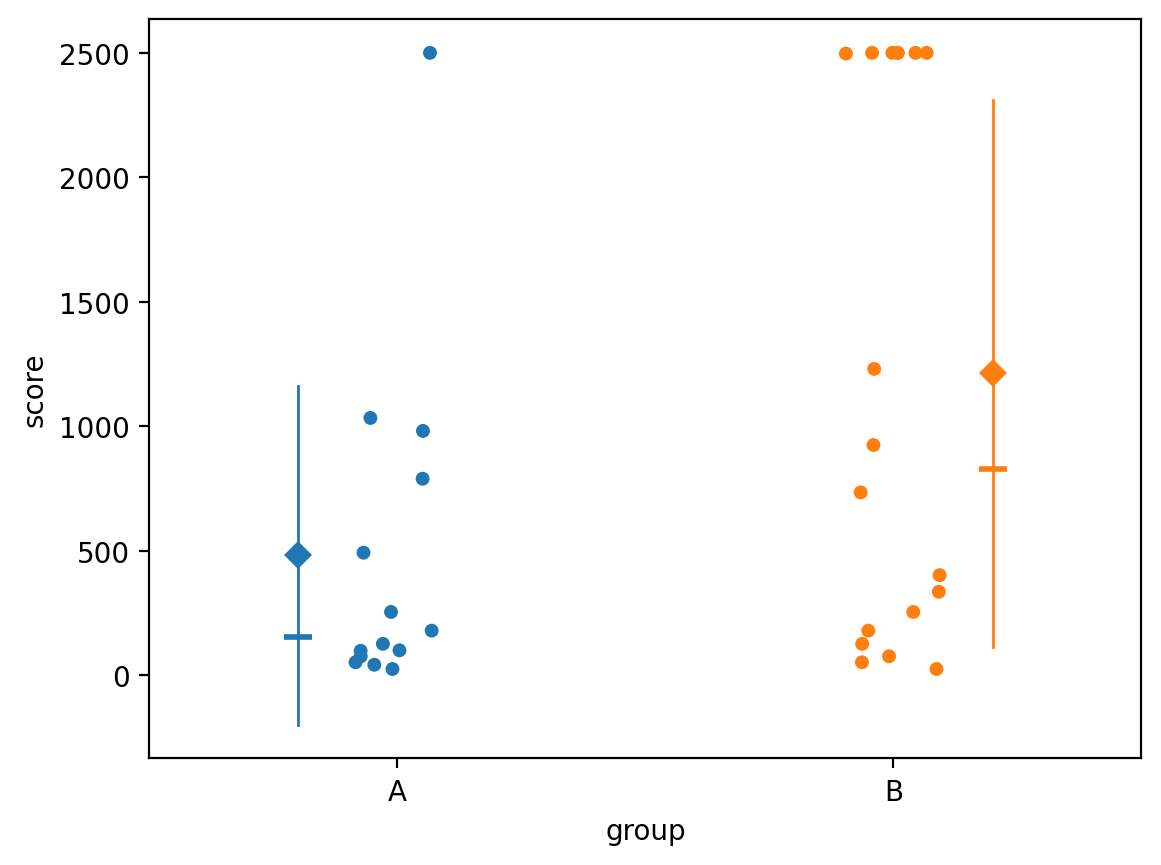

In [5]:
# plot observations
sns.stripplot(data=outliers2, x="group", y="score", hue="group")

# show means and standard deviations
sns.pointplot(data=outliers2, x="group", y="score", hue="group", dodge=0.4,
              estimator="mean", errorbar="sd", marker="D",
              markersize=5, err_kws={"linewidth":1})

# show also medians
sns.pointplot(data=outliers2, x="group", y="score", hue="group", dodge=0.4,
              estimator="median", errorbar=None, marker="_", markersize=10)

In [6]:
scoresA = outliers2[outliers2["group"]=="A"]["score"]
scoresB = outliers2[outliers2["group"]=="B"]["score"]

#### Using a regular two-sample t-test

In [7]:
from scipy.stats import ttest_ind
ttest_ind(scoresA, scoresB, equal_var=False)

Ttest_indResult(statistic=-2.3080671633801986, pvalue=0.028387263383781086)

The outliers pull the mean in group B to a high value,
which leads us to conclude there is a statistically significant difference between the two groups.

#### Using the Mann-Whitney U-test

In [8]:
from scipy.stats import mannwhitneyu

mannwhitneyu(scoresA, scoresB)

MannwhitneyuResult(statistic=77.0, pvalue=0.06389372690752373)

The Mann-Whitney $U$-test is better at ignoring the outliers,
and correctly fails to reject the null.
Indeed,
looking at the graph, we see there is not a big difference between the two groups.

## Confidence interval for the effect size

## Related



## Discussion

## Links